In [18]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline

# Needed for decision tree visualization
import pydotplus
from IPython.display import Image

In [19]:
csvpath = Path('../Project-03/teamGameStats.csv')
teamstats_df = pd.read_csv(csvpath)

In [20]:
teamstats_df = teamstats_df.drop(columns=['TEAM','MATCHUP','GAMEDATE'])

In [21]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('W/L', axis=1, inplace=True)
X.head(16)

,MIN,PTS,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,FT%,OREB,DREB,REB,AST,TOV,STL,BLK,PF,+/-
0,48,129,45,92,48.9,13,32,40.6,26,34,76.5,14,37,51,20,10,8,7,19,12
1,48,109,39,83,47.0,18,43,41.9,13,17,76.5,7,39,46,26,14,6,8,25,8
2,53,112,41,101,40.6,6,27,22.2,24,30,80.0,20,32,52,25,13,6,4,16,-10
3,48,109,38,87,43.7,16,39,41.0,17,21,81.0,16,37,53,28,17,9,1,13,2
4,48,101,36,91,39.6,10,36,27.8,19,28,67.9,13,34,47,18,9,7,3,17,-8
5,48,106,37,82,45.1,14,33,42.4,18,21,85.7,9,37,46,22,23,6,8,19,-6
6,48,105,36,88,40.9,17,45,37.8,16,21,76.2,6,31,37,27,11,6,7,21,-19
7,48,110,41,91,45.1,11,32,34.4,17,19,89.5,9,27,36,28,15,10,5,19,-4
8,48,112,37,96,38.5,17,38,44.7,21,24,87.5,16,31,47,23,15,9,5,15,6
9,48,117,45,92,48.9,10,32,31.3,17,20,85.0,8,33,41,33,12,7,5,27,-12


In [22]:
# defining target vector
#y=teamstats_df['W/L'].values.reshape(-1,1)
# defining target vector
y=teamstats_df['W/L'].ravel()
y[:5]

array(['W', 'W', 'L', 'W', 'L'], dtype=object)

In [23]:
# converting 'W/L' to 0/1's
y=teamstats_df['W/L'].apply(lambda x: 1 if x=="W" else 0)
y[:5]

0    1
1    1
2    0
3    1
4    0
Name: W/L, dtype: int64

In [24]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [25]:
# Creating StandardScaler instance
#scaler = StandardScaler()

# Fitting Standard Scaller
#X_scaler = scaler.fit(X_train)

In [26]:
# Scaling data
#X_train_scaled = X_scaler.transform(X_train)
#X_test_scaled = X_scaler.transform(X_test)

In [27]:
 # Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [28]:
 # Fitting the model
rf_model = rf_model.fit(X_train, y_train)

In [29]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

In [30]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [31]:
 # Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,209,0
Actual 1,0,216


Accuracy Score : 1.0
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       209
           1       1.00      1.00      1.00       216

    accuracy                           1.00       425
   macro avg       1.00      1.00      1.00       425
weighted avg       1.00      1.00      1.00       425



In [32]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_


In [33]:
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.6489583842349573, '+/-'),
 (0.05585025869660397, 'PTS'),
 (0.055324491556898725, 'FG%'),
 (0.04886776304344406, 'DREB'),
 (0.03456614007876124, 'REB'),
 (0.03277980701039376, '3P%'),
 (0.027432867178727286, 'FGM'),
 (0.01024148981994068, 'AST'),
 (0.009802695942440556, 'FT%'),
 (0.009557876774445374, '3PM'),
 (0.008404239409599982, 'STL'),
 (0.008311467841312873, 'FGA'),
 (0.008284038940760826, 'BLK'),
 (0.007864809415819423, 'FTM'),
 (0.007167589955712742, 'FTA'),
 (0.0066054691747843034, 'TOV'),
 (0.006473049239473934, 'OREB'),
 (0.006361675852583479, '3PA'),
 (0.005831836543417579, 'PF'),
 (0.0013140492899218516, 'MIN')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

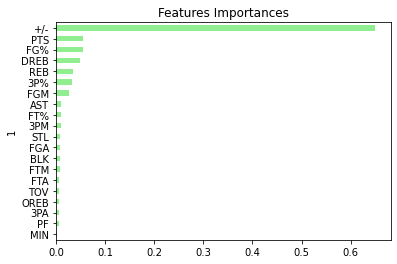

In [34]:
 # Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)